In [1]:
from google.colab import files
upload = files.upload()

Saving headlines_df.csv to headlines_df.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import phrases
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import warnings
warnings.filterwarnings("ignore")
from gensim.models import CoherenceModel
from tqdm import tqdm_notebook as tq
nltk.download('wordnet')
import spacy

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
headlines = pd.read_csv('headlines_df.csv')
headlines.head()

,brand,country,medium,headline,industry
0,Tzabar,Israel,Print,roger waters live in paris 3 nights concert €...,Transport & Tourism
1,Infiniti,United States,Print,accelerating the future,Automotive & Services
2,Toyota,Canada,Print,official ride of the spinfest amateur dj awards,Automotive & Services
3,Friends of the Earth,Germany,Print,travelling fruits cause pollution think global...,Public interest & Non-profit
4,Max Factor,Colombia,Print,the art of beauty,Beauty & Health


In [0]:
text = headlines.headline

In [0]:
def remove_stopwords(text):
    return [token for token in simple_preprocess(text, deacc=True) if token not in STOPWORDS and len(token)>2]
def lemmatize_stemming(text):
    short = []
    for word in text:
        short.append(SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(word)))
    return short
def trigrams(text):
    bigram = gensim.models.Phrases(text)
    bigramizer = phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[text], threshold=5)
    trigramizer = phrases.Phraser(trigram)
    return [trigramizer[bigramizer[doc]] for doc in text]

def preprocess(text):
    stopped_tokenize = text.map(remove_stopwords)
    short = list(stopped_tokenize.map(lemmatize_stemming))
    return trigrams(short)

In [0]:
processed = pd.Series(preprocess(text))

In [0]:
dictionary = gensim.corpora.Dictionary(processed)
dictionary.filter_extremes(no_below=5, no_above=0.33, keep_n=20000)

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

In [0]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [64]:
lda = models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=3, decay=.9)
cscore = CoherenceModel(model=lda, texts=processed, dictionary=dictionary, coherence='c_v').get_coherence()
print(cscore)
for idx, topic in lda.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

0.41944896114494
Topic: 0 
Words: 0.009*"power" + 0.008*"insid" + 0.007*"sound" + 0.007*"feel" + 0.006*"faster" + 0.006*"woman" + 0.006*"toy" + 0.006*"milk" + 0.006*"think" + 0.006*"natur"
Topic: 1 
Words: 0.008*"skin" + 0.008*"protect" + 0.007*"save" + 0.007*"space" + 0.007*"origin" + 0.006*"tast" + 0.006*"ford" + 0.006*"energi" + 0.006*"child" + 0.005*"belong"
Topic: 2 
Words: 0.008*"let" + 0.008*"dream" + 0.007*"sleep" + 0.006*"hand" + 0.005*"world" + 0.005*"job" + 0.005*"wall" + 0.005*"built" + 0.005*"incred" + 0.005*"refresh"
Topic: 3 
Words: 0.007*"fish" + 0.006*"read" + 0.006*"word" + 0.006*"pain" + 0.005*"choic" + 0.005*"like" + 0.005*"life" + 0.005*"free" + 0.004*"peopl" + 0.004*"fight"
Topic: 4 
Words: 0.010*"new" + 0.008*"imagin" + 0.006*"need" + 0.006*"night" + 0.006*"know" + 0.006*"good" + 0.006*"need_help" + 0.005*"pet" + 0.005*"there" + 0.005*"movi"
Topic: 5 
Words: 0.008*"book" + 0.007*"game" + 0.007*"stop" + 0.007*"driver" + 0.006*"readi" + 0.006*"music" + 0.006*"colou

In [67]:
lda2 = models.LdaMulticore(corpus_tfidf, num_topics=100, id2word=dictionary, passes=3, decay=.9)
cscore = CoherenceModel(model=lda2, texts=processed, dictionary=dictionary, coherence='c_v').get_coherence()
print(cscore)
for idx, topic in lda2.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

0.6171967228678602
Topic: 0 
Words: 0.065*"milk" + 0.061*"elimin" + 0.054*"thank" + 0.048*"innov" + 0.042*"excit" + 0.033*"award" + 0.027*"rate" + 0.020*"use_condom" + 0.018*"bear" + 0.018*"maximum"
Topic: 1 
Words: 0.040*"cold" + 0.040*"express" + 0.039*"heart" + 0.034*"flight" + 0.033*"friday" + 0.028*"record" + 0.028*"harder" + 0.027*"trendi" + 0.026*"heineken" + 0.026*"sustain"
Topic: 2 
Words: 0.064*"man" + 0.059*"expect" + 0.053*"water" + 0.049*"import" + 0.044*"like" + 0.036*"adventur" + 0.036*"spot" + 0.036*"time" + 0.034*"round" + 0.033*"deliv"
Topic: 3 
Words: 0.083*"breath" + 0.046*"born" + 0.034*"catch" + 0.033*"deal" + 0.031*"relax" + 0.029*"absolut" + 0.029*"kid" + 0.026*"theyr" + 0.024*"wet" + 0.023*"equip"
Topic: 4 
Words: 0.060*"pain" + 0.047*"head" + 0.043*"cool" + 0.040*"mini" + 0.034*"drop" + 0.032*"modern" + 0.031*"consum" + 0.030*"museum" + 0.029*"respect" + 0.026*"weve"
Topic: 5 
Words: 0.081*"open" + 0.054*"safeti" + 0.050*"winter" + 0.050*"hour" + 0.040*"far" +

In [0]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
params = {'n_components': range(10,26), 'learning_decay' : [.5,.6,.7,.8,.9]}
#  'doc_topic_prior': [.05,.1,.2,.3,.4,.5,.75,1], 'topic_word_prior':[.05,.1,.2,.3,.4,.5,.75,1]


In [0]:
stopped = text.map(remove_stopwords)

In [0]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [10]:
def lemmatize(text, postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
  text_out = []
  for item in tq(text):
    doc = nlp(' '.join(item))
    text_out.append(' '.join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in postags]))
  return text_out
lemmas = lemmatize(list(stopped))

In [11]:
lemmas[:5]

['roger water live paris night concert monday',
 'accelerate future',
 'official ride spinf amateur award',
 'travel fruit cause pollution think global eat local',
 'art beauty']

In [0]:
vectorizer = TfidfVectorizer(analyzer='word', min_df=5, max_df=.33, token_pattern='[a-zA-Z0-9]{2,}', max_features=20000)
data_vect = vectorizer.fit_transform(lemmas)

In [46]:
lda = LatentDirichletAllocation()
model = RandomizedSearchCV(lda,param_distributions=params, verbose=3, n_jobs=-1)
model.fit(data_vect)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.1min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LatentDirichletAllocation(batch_size=128,
                                                       doc_topic_prior=None,
                                                       evaluate_every=-1,
                                                       learning_decay=0.7,
                                                       learning_method='batch',
                                                       learning_offset=10.0,
                                                       max_doc_update_iter=100,
                                                       max_iter=10,
                                                       mean_change_tol=0.001,
                                                       n_components=10,
                                                       n_jobs=None,
                                                       perp_tol=0.1,
                                                

In [47]:
best_model = model.best_estimator_
print(model.best_params_)

{'n_components': 10, 'learning_decay': 0.9}


In [48]:
print(model.best_score_)

-172277.73088687906


In [49]:
print(best_model.perplexity(data_vect))

9390.427197416742


In [0]:
lda_output = best_model.transform(data_vect)

In [18]:
for n in range(lda_output.shape[0]):
    topic_most_pr = lda_output[n].argmax()
    print("doc: {} topic: {}\n".format(n,topic_most_pr))

doc: 0 topic: 4

doc: 1 topic: 5

doc: 2 topic: 9

doc: 3 topic: 8

doc: 4 topic: 0

doc: 5 topic: 5

doc: 6 topic: 3

doc: 7 topic: 2

doc: 8 topic: 4

doc: 9 topic: 10

doc: 10 topic: 7

doc: 11 topic: 5

doc: 12 topic: 0

doc: 13 topic: 10

doc: 14 topic: 0

doc: 15 topic: 8

doc: 16 topic: 0

doc: 17 topic: 9

doc: 18 topic: 4

doc: 19 topic: 5

doc: 20 topic: 6

doc: 21 topic: 9

doc: 22 topic: 4

doc: 23 topic: 6

doc: 24 topic: 5

doc: 25 topic: 9

doc: 26 topic: 0

doc: 27 topic: 10

doc: 28 topic: 3

doc: 29 topic: 4

doc: 30 topic: 1

doc: 31 topic: 4

doc: 32 topic: 5

doc: 33 topic: 10

doc: 34 topic: 0

doc: 35 topic: 0

doc: 36 topic: 3

doc: 37 topic: 10

doc: 38 topic: 7

doc: 39 topic: 4

doc: 40 topic: 7

doc: 41 topic: 2

doc: 42 topic: 4

doc: 43 topic: 7

doc: 44 topic: 10

doc: 45 topic: 3

doc: 46 topic: 6

doc: 47 topic: 1

doc: 48 topic: 5

doc: 49 topic: 2

doc: 50 topic: 0

doc: 51 topic: 7

doc: 52 topic: 2

doc: 53 topic: 3

doc: 54 topic: 0

doc: 55 topic:

In [35]:
best_model.components_

array([[ 0.10000506,  0.10000431,  0.10000165, ...,  0.10001548,
         0.10000202, 11.11057689],
       [ 7.18181667,  0.10002299,  0.10002212, ...,  0.10002936,
         0.84374449,  0.10000103],
       [ 0.10000051,  0.93071575,  0.10001507, ...,  0.10003607,
         0.10001524,  0.10000242],
       ...,
       [ 0.10000741,  0.1000023 ,  6.52309525, ...,  0.10000298,
        18.06507253,  0.10000129],
       [ 0.10000335,  0.10000706,  0.10001366, ...,  0.10000195,
         3.8374202 ,  0.10000279],
       [ 0.10000007,  0.10003715,  0.10000345, ...,  0.72111578,
         1.32509666,  0.10000447]])

In [36]:
lda_output

array([[0.02783209, 0.02782228, 0.02782175, ..., 0.02782314, 0.02785255,
        0.02783296],
       [0.04196334, 0.04196594, 0.04195937, ..., 0.04197991, 0.6221148 ,
        0.04205878],
       [0.03661617, 0.6703957 , 0.03663979, ..., 0.03661623, 0.03662685,
        0.03662183],
       ...,
       [0.02136462, 0.02135771, 0.02136039, ..., 0.0652372 , 0.02135677,
        0.02135718],
       [0.03338548, 0.03337712, 0.0333747 , ..., 0.03337933, 0.20906537,
        0.52392827],
       [0.03402675, 0.03406583, 0.03403091, ..., 0.03402671, 0.03402853,
        0.03402598]])

In [0]:
def show_topics(vectorizer, lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [55]:
show_topics(vectorizer, best_model)

[array(['know', 'love', 'come', 'get', 'not', 'great', 'new', 'choose',
        'colour', 'good'], dtype='<U15'),
 array(['want', 'dream', 'beer', 'bad', 'not', 'feel', 'imagine',
        'insurance', 'energy', 'do'], dtype='<U15'),
 array(['stop', 'kill', 'not', 'happen', 'dog', 'art', 'care', 'do',
        'mini', 'light'], dtype='<U15'),
 array(['need', 'help', 'big', 'easy', 'longer', 'late', 'violence',
        'original', 'not', 'online'], dtype='<U15'),
 array(['music', 'book', 'story', 'world', 'color', 'live', 'read',
        'happy', 'break', 'year'], dtype='<U15'),
 array(['good', 'time', 'not', 'child', 'sound', 'bring', 'do', 'idea',
        'matter', 'enjoy'], dtype='<U15'),
 array(['drive', 'not', 'do', 'save', 'drink', 'life', 'think', 'fit',
        'sleep', 'future'], dtype='<U15'),
 array(['new', 'eat', 'build', 'sport', 'wear', 'audi', 'man', 'tough',
        'room', 'sun'], dtype='<U15'),
 array(['life', 'hair', 'fun', 'day', 'taste', 'clothe', 'fast', 'summer',
  

In [0]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
clusters = KMeans(n_clusters=10).fit_predict(lda_output)
svd = TruncatedSVD(n_components=2)
lda_output_svd = svd.fit_transform(lda_output)

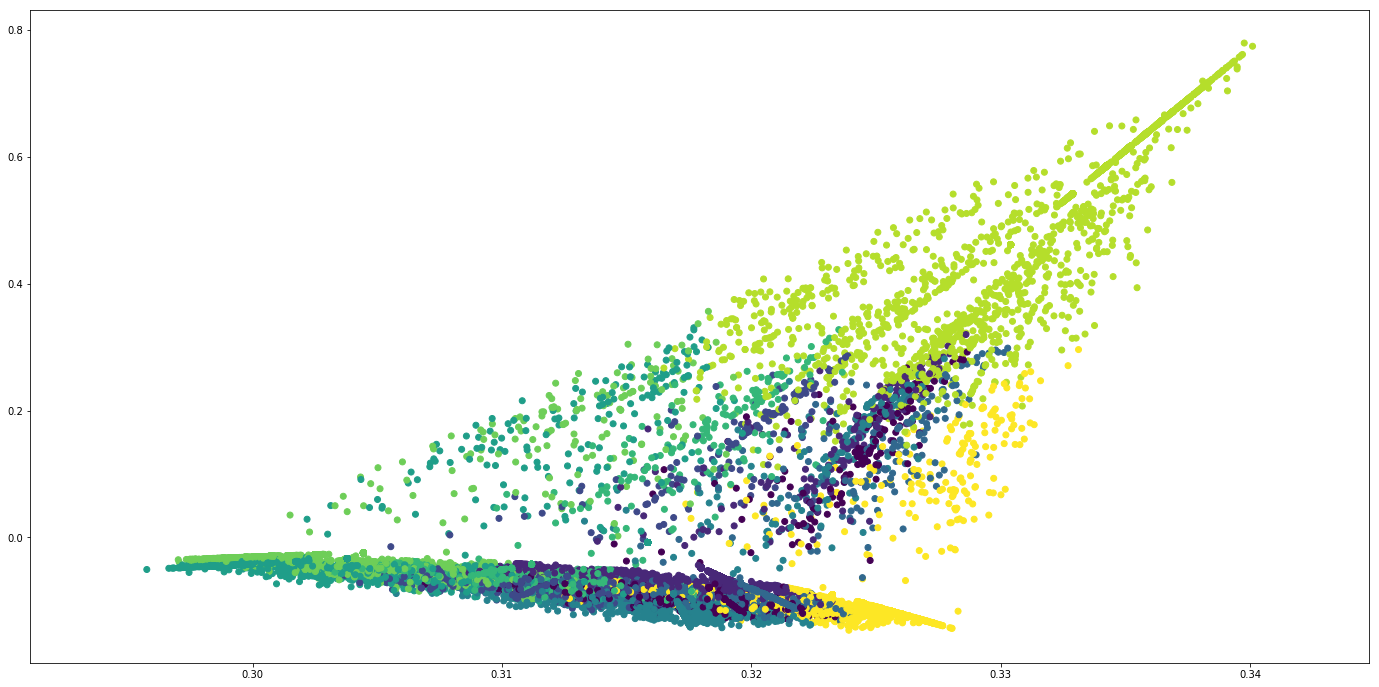

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
x = lda_output_svd[:,0]
y = lda_output_svd[:,1]
plt.figure(figsize=(24,12))
plt.scatter(x,y,c=clusters)

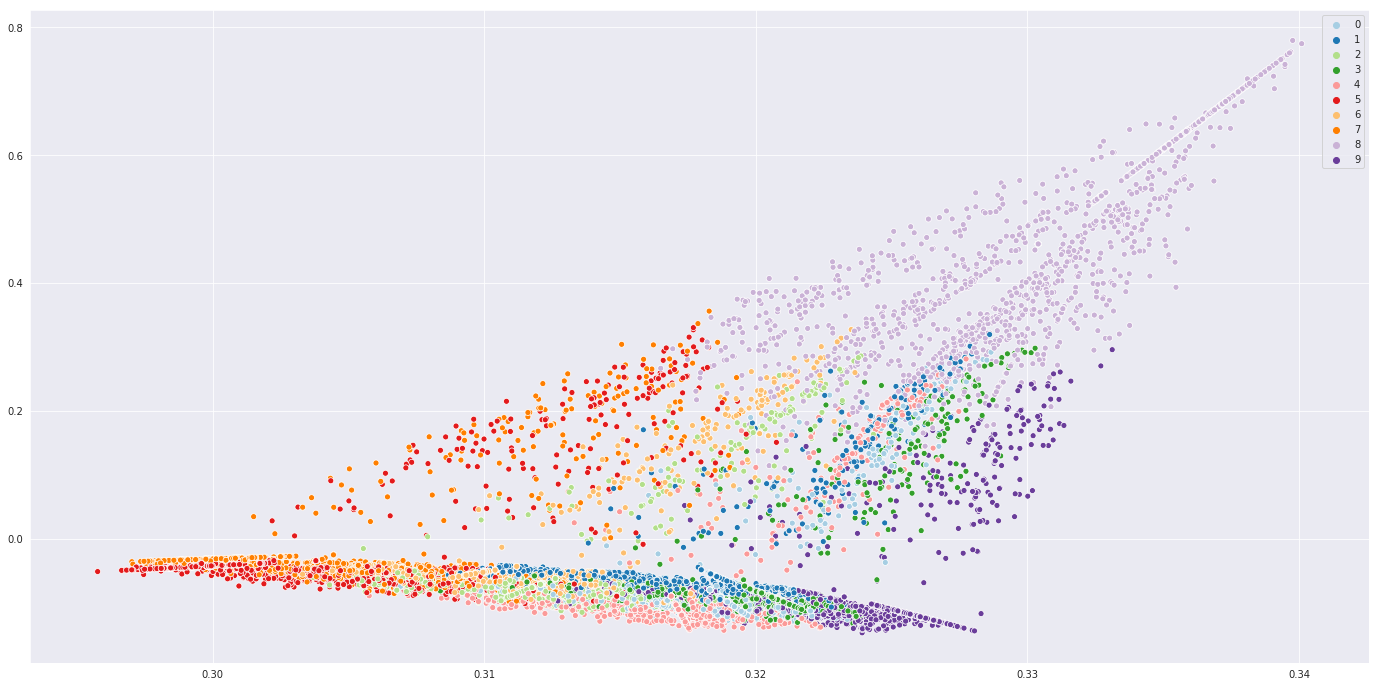

In [127]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))
sns.scatterplot(x=lda_output_svd[:,0], y=lda_output_svd[:,1], hue=clusters, legend='full', palette=sns.color_palette('Paired')[:10], markers='v')

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
lda_output_pca = pca.fit_transform(lda_output)

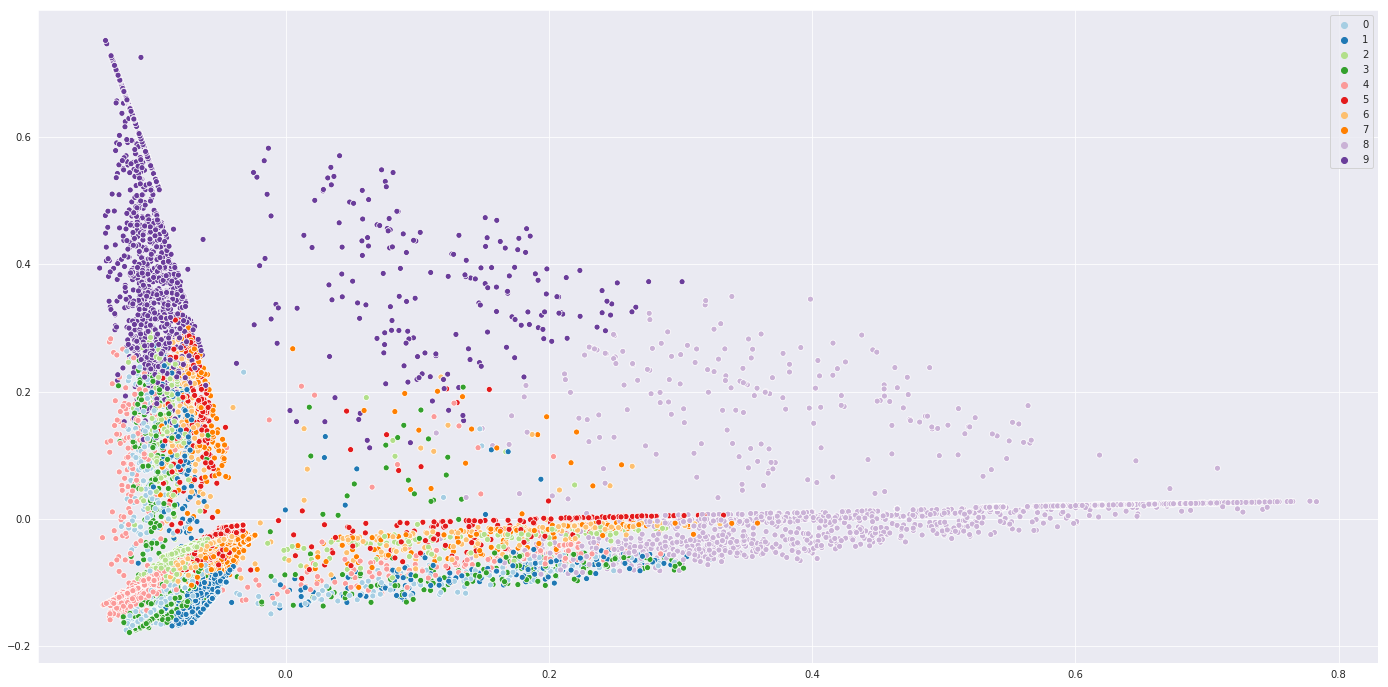

In [128]:
x = lda_output_pca[:,0]
y = lda_output_pca[:,1]
plt.figure(figsize=(24,12))
sns.scatterplot(x,y,hue=clusters, legend='full', palette=sns.color_palette('Paired')[:10])

In [0]:
pca3 = PCA(n_components=3)
lda_output_pca3 = pca3.fit_transform(lda_output)

In [0]:
x3 = lda_output_pca3[:,0]
y3 = lda_output_pca3[:,1]
z3 = lda_output_pca3[:,2]

In [137]:
d = {'x':x3, 'y':y3, 'z':z3, 'topic':clusters}
pca3df = pd.DataFrame(d)
pca3df.head()

,x,y,z,topic
0,0.410109,0.001146,0.008230,8
1,-0.061952,-0.066664,-0.006681,6
2,0.181834,-0.014107,-0.005736,7
3,-0.102141,-0.156142,0.449203,3
4,-0.041644,-0.020952,-0.005621,5


In [146]:
sorted(pca3df.topic.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

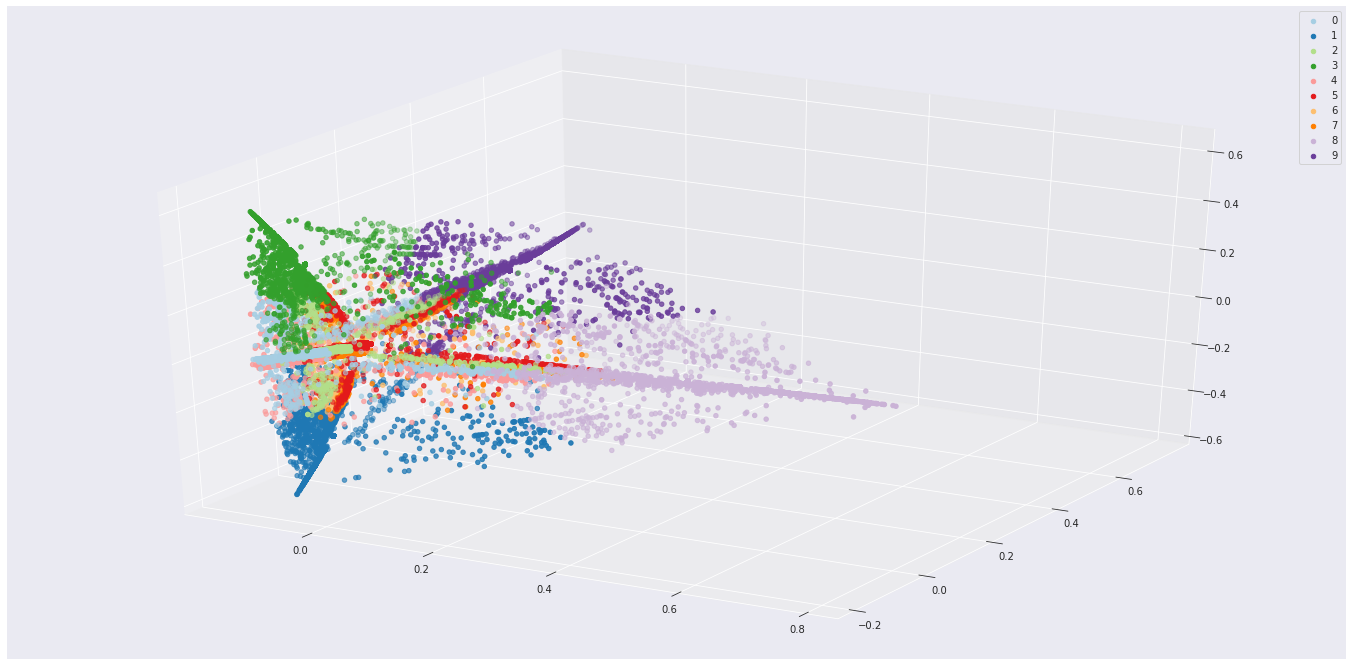

In [147]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111, projection='3d')
for i, topic in enumerate(sorted(pca3df.topic.unique())):
  ax.scatter(xs=pca3df.loc[pca3df.topic == topic,'x'],ys=pca3df.loc[pca3df.topic == topic,'y'],zs=pca3df.loc[pca3df.topic == topic,'z'],label=topic, c=sns.color_palette('Paired')[i])
ax.legend()

In [119]:
d = {'x':x3, 'y':y3, 'z':z3}
pca3df = pd.DataFrame(d)
pca3df.head()

,x,y,z
0,0.410109,0.001146,0.008230
1,-0.061952,-0.066664,-0.006681
2,0.181834,-0.014107,-0.005736
3,-0.102141,-0.156142,0.449203
4,-0.041644,-0.020952,-0.005621


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

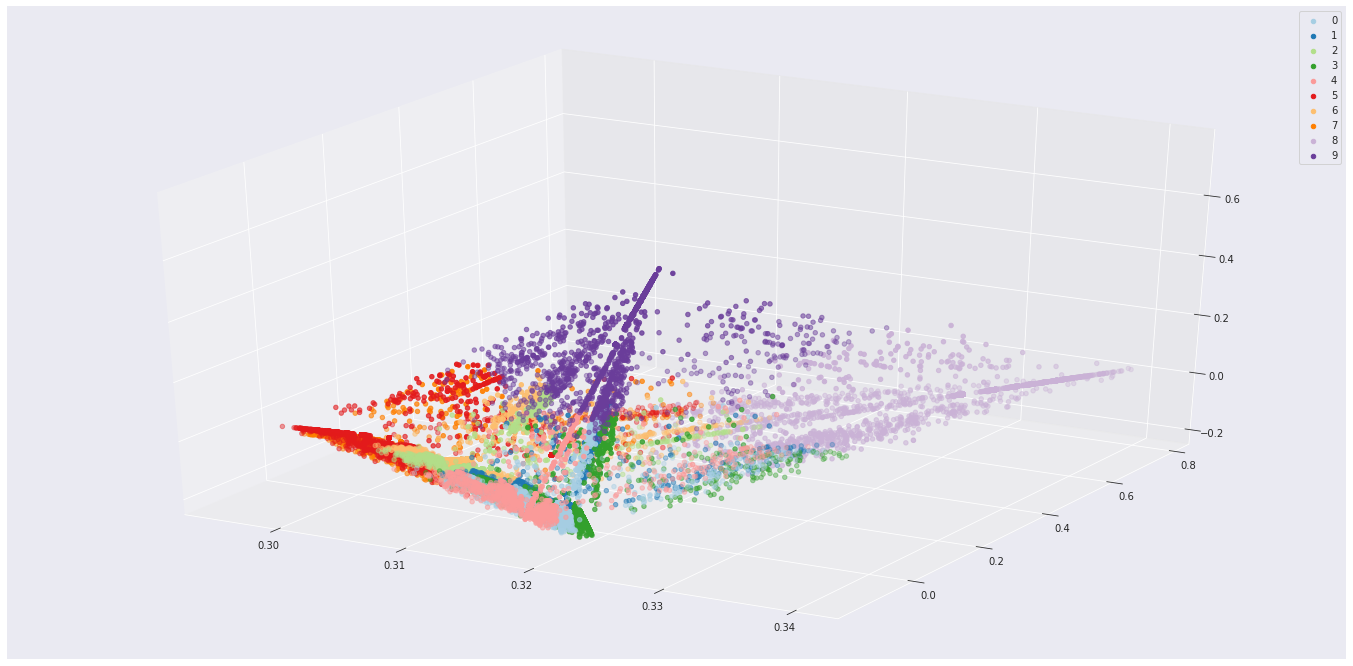

In [149]:
svd3 = TruncatedSVD(n_components=3)
lda_output_svd3 = svd3.fit_transform(lda_output)
sx3 = lda_output_svd3[:,0]
sy3 = lda_output_svd3[:,1]
sz3 = lda_output_svd3[:,2]
s = {'x':sx3, 'y':sy3, 'z':sz3, 'topic':clusters}
svd3df = pd.DataFrame(s)
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111, projection='3d')
for i, topic in enumerate(sorted(svd3df.topic.unique())):
  ax.scatter(xs=svd3df.loc[svd3df.topic == topic,'x'],ys=svd3df.loc[svd3df.topic == topic,'y'],zs=svd3df.loc[svd3df.topic == topic,'z'],label=topic, c=sns.color_palette('Paired')[i])
ax.legend()

In [81]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [0]:
import pyLDAvis.sklearn

In [0]:
panel = pyLDAvis.sklearn.prepare(best_model, data_vect, vectorizer, mds='tsne')

In [86]:
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9       81.071793  174.894516       1        1  11.189021
0      303.463806   97.036987       2        1  10.338248
3      342.236786 -161.281631       3        1  10.335921
1      -94.439682  -24.377970       4        1  10.219951
5      -63.947315 -288.053894       5        1  10.172975
6     -145.995560  237.815414       6        1   9.902649
2      111.532730  -88.884102       7        1   9.649059
4     -286.382996 -210.497055       8        1   9.569227
7     -325.215912   47.788166       9        1   9.494592
8      162.984543 -351.244659      10        1   9.128357, topic_info=     Category        Freq       Term       Total  loglift  logprob
1189  Default  130.000000      drive  130.000000  30.0000  30.0000
2562  Default   99.000000      music   99.000000  29.0000  29.0000
400   Default   69.000000       book   69.000000  28.0000  28.0000
3368  Default  106.000000       save  106.000000  27.0000  27.0000
1182  Default   69.000000      dream   69.000000  26.0000  26.0000
1767  Default   68.000000       hair   68.000000  25.0000  25.0000
738   Default   53.000000      color   53.000000  24.0000  24.0000
1620  Default   61.000000        fun   61.000000  23.0000  23.0000
322   Default   54.000000       beer   54.000000  22.0000  22.0000
1223  Default   66.000000        eat   66.000000  21.0000  21.0000
3719  Default   96.000000      story   96.000000  20.0000  20.0000
3715  Default  136.000000       stop  136.000000  19.0000  19.0000
1186  Default   88.000000      drink   88.000000  18.0000  18.0000
2115  Default   53.000000        job   53.000000  17.0000  17.0000
1519  Default   44.000000        fit   44.000000  16.0000  16.0000
3778  Default   41.000000     summer   41.000000  15.0000  15.0000
709   Default   51.000000     clothe   51.000000  14.0000  14.0000
2154  Default   87.000000       kill   87.000000  13.0000  13.0000
3111  Default   65.000000       read   65.000000  12.0000  12.0000
2032  Default   39.000000  insurance   39.000000  11.0000  11.0000
469   Default   51.000000      build   51.000000  10.0000  10.0000
1788  Default   69.000000      happy   69.000000   9.0000   9.0000
435   Default   49.000000      break   49.000000   8.0000   8.0000
1951  Default   46.000000    imagine   46.000000   7.0000   7.0000
1500  Default   41.000000       film   41.000000   6.0000   6.0000
316   Default   38.000000     beauty   38.000000   5.0000   5.0000
3870  Default   77.000000      taste   77.000000   4.0000   4.0000
1785  Default   68.000000     happen   68.000000   3.0000   3.0000
3608  Default   65.000000      sound   65.000000   2.0000   2.0000
2483  Default   33.000000       mini   33.000000   1.0000   1.0000
...       ...         ...        ...         ...      ...      ...
3836  Topic10   19.099863     switch   24.431247   2.1476  -5.4700
1090  Topic10    8.574068       diet   10.435018   2.1974  -6.2710
1767  Topic10   50.274068       hair   68.681676   2.0818  -4.5022
2735  Topic10   32.511608       pain   44.476803   2.0804  -4.9381
2119  Topic10    8.893502      joint   10.885072   2.1917  -6.2344
1845  Topic10   17.797710       hero   23.611011   2.1111  -5.5407
3114  Topic10   28.977293      ready   41.124799   2.0437  -5.0532
317   Topic10   13.999753        bed   18.264882   2.1278  -5.7807
3293  Topic10   28.524651       rock   41.769968   2.0124  -5.0690
4075  Topic10    9.789515       ugly   12.166047   2.1764  -6.1384
2493  Topic10   29.068745       miss   46.618200   1.9215  -5.0501
3870  Topic10   40.936764      taste   77.112122   1.7606  -4.7077
1463  Topic10   16.876659     father   24.194300   2.0336  -5.5938
1423  Topic10   32.638705        eye   61.532946   1.7597  -4.9342
836   Topic10   25.609319    control   45.389939   1.8215  -5.1768
3186  Topic10   16.418481     relief   24.293189   2.0020  -5.6213
1457  Topic10   37.340900       fast   79.210